# Ejercicio Formativo 1 Capítulo 4



## Cargando Datos

In [ ]:
!unzip Data.zip

Archive:  Data.zip
   creating: Data/Areas Urbanas/
  inflating: Data/Areas Urbanas/areas_urbanas.dbf  
  inflating: Data/Areas Urbanas/areas_urbanas.prj  
  inflating: Data/Areas Urbanas/areas_urbanas.sbn  
  inflating: Data/Areas Urbanas/areas_urbanas.sbx  
  inflating: Data/Areas Urbanas/areas_urbanas.shp  
  inflating: Data/Areas Urbanas/areas_urbanas.shp.xml  
  inflating: Data/Areas Urbanas/areas_urbanas.shx  
  inflating: Data/Areas Urbanas/Disclaimer.txt  
   creating: Data/Distritos Censales/
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.dbf  
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.prj  
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.qpj  
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.shp  
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.shx  
  inflating: Data/Distritos Censales/Distritos Censales RM.dbf  
  inflating: Data/Distritos Censales/Distritos C

## Importando Librerías

In [ ]:
import geopandas as gpd
import pandas as pd

## Misión 1: Grafique en un mapa los distritos censales ubicados en el área urbana de Santiago, utilizando una escala de colores basada en el costo monetario en pesos que tendría el edificarlos completamente con viviendas de 1 piso.

### 1. Cargue los archivos .shp correspondientes, utilizando la función read_file de GeoPandas

In [ ]:
distritos = gpd.read_file('Data/Distritos Censales/Distritos Censales RM.shp')

In [ ]:
chile_urbano = gpd.read_file('Data/Areas Urbanas/areas_urbanas.shp')

### 2.  Revise los datos, tanto sus aspectos tabulares como los geoespaciales.

Distritos:
- NOM_REG: Nombre de la región
- COD_PROV: Código de la provincia
- NOM_PROV: Nombre de la provincia
- COD_COM: Código de la comuna
- NOM_COM: Nombre de la comuna
- NOM_DIS: Nombre del distrito censal
- CODIGO: Código del del distrito censal
- E: Número de hogares clase E por distrito censal
- D: Número de hogares clase D por distrito censal
- C3: Número de hogares clase C3 por distrito censal
- C2: Número de hogares clase C2 por distrito censal
- ABC1: Número de hogares clase ABC1 por distrito censal
- ADIMARK_T: Total de hogares
- Area: Area del distrito
- Densidad: Densidad poblacional del distrito
- 1_UF_M2: Valor del metro cuadrado en UF

Pensemos que quisiéramos visualizar las áreas por distrito y que estas se coloreen en base a esto.

In [ ]:
distritos.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6..."
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345546.017 6299748.840, 345650.511 6..."
3,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,1310104.0,52.0,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((344856.320 6298892.632, 345672.277 6..."
4,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,1310105.0,45.0,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((343856.526 6298225.435, 344041.982 6..."


In [ ]:
distritos['NOM_PROV'].value_counts()

NOM_PROV
Santiago      312
Melipilla      41
Maipo          34
Cordillera     26
Talagante      20
Chacabuco      16
Name: count, dtype: int64

In [ ]:
distritos.describe()

,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2
count,4.490000e+02,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,4.490000e+02,449.000000,449.000000
mean,1.320575e+06,198.677060,1221.055679,1239.336303,799.746102,215.561247,3674.376392,3.427451e+07,21.551871,5.048530
std,1.553424e+04,230.595397,1209.411846,1090.013162,870.943145,519.746952,2840.039537,1.390632e+08,17.448771,5.664918
min,1.310101e+06,0.000000,20.000000,11.000000,2.000000,0.000000,48.000000,3.673118e+05,0.000000,0.000000
25%,1.311018e+06,45.000000,373.000000,496.000000,216.000000,10.000000,1801.000000,1.028728e+06,1.810000,0.790000
50%,1.312204e+06,123.000000,924.000000,1110.000000,547.000000,43.000000,3548.000000,1.682413e+06,23.030000,4.220000
75%,1.320305e+06,277.000000,1843.000000,1632.000000,1046.000000,147.000000,4756.000000,1.732345e+07,35.090000,6.230000
max,1.360503e+06,2036.000000,14371.000000,8811.000000,5481.000000,5135.000000,26477.000000,2.022821e+09,73.240000,41.130000


In [ ]:
chile_urbano.head()

,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,Chiguayante,Ciudad,29855.998337,1.038076e+07,"POLYGON ((140044.634 5911024.284, 140051.361 5..."
1,Lota,Ciudad,14233.349738,5.262642e+06,"POLYGON ((131359.666 5889462.902, 131475.343 5..."
2,Coronel,Ciudad,41577.791832,1.551685e+07,"POLYGON ((127278.440 5896965.436, 127411.675 5..."
3,San Rosendo,Ciudad,6499.369423,1.534402e+06,"POLYGON ((168583.830 5870293.970, 168725.579 5..."
4,Concepción,Ciudad,82986.894378,3.454227e+07,"POLYGON ((133504.854 5919782.212, 136052.580 5..."


In [ ]:
chile_urbano["TIPO_AREA"].value_counts()

TIPO_AREA
Pueblo       189
Ciudad       178
Aldea         30
Localidad      2
Caserio        1
Name: count, dtype: int64

### 3. Grafique Datos

<Axes: >

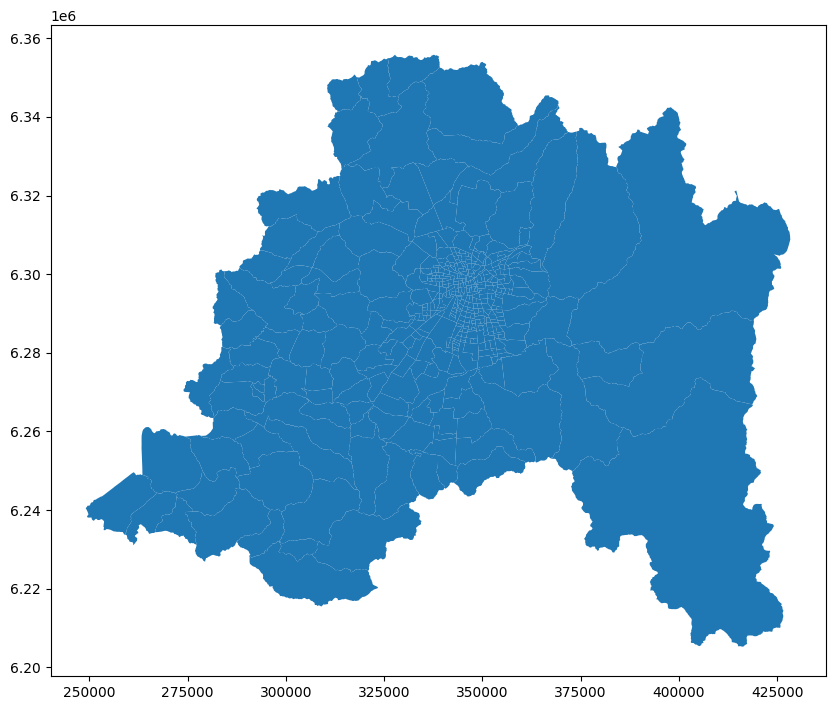

In [ ]:
distritos.plot(figsize = (10,10))

<Axes: >

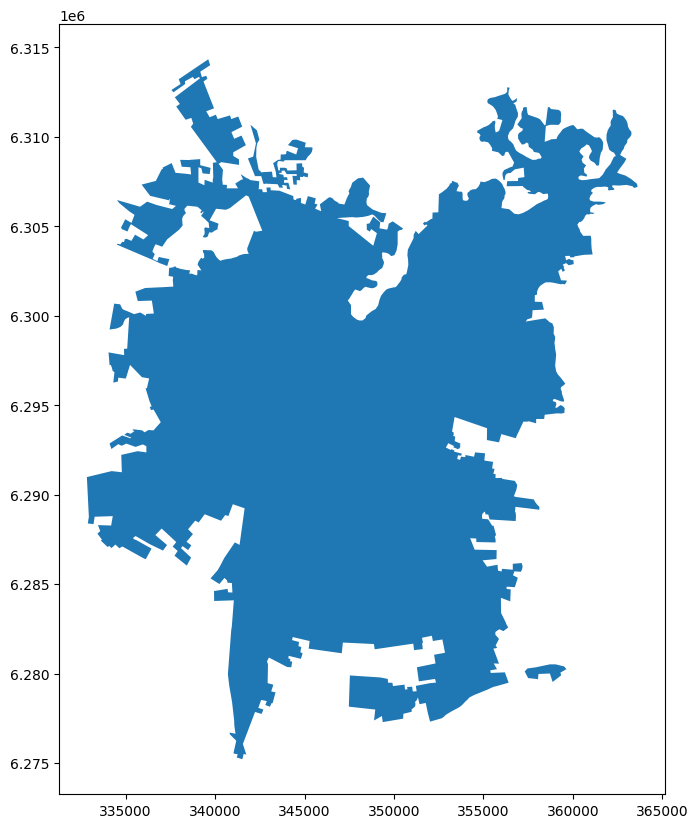

In [ ]:
santiago_urbano = chile_urbano.loc[chile_urbano['NOMBRE']=='Santiago']
santiago_urbano.plot(figsize = (10,10))

### 4. Intersecte las capas que considere necesarias, generando así un nuevo GeoDataFrame que solo contenga los distritos urbanos de Santiago. Cuide tener la misma proyección al hacer este proceso.

Antes de hacer la combinación se revisan las proyecciones

In [ ]:
distritos.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
santiago_urbano.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
distritos_urbanos = gpd.overlay(santiago_urbano, distritos, how='intersection')

<Axes: >

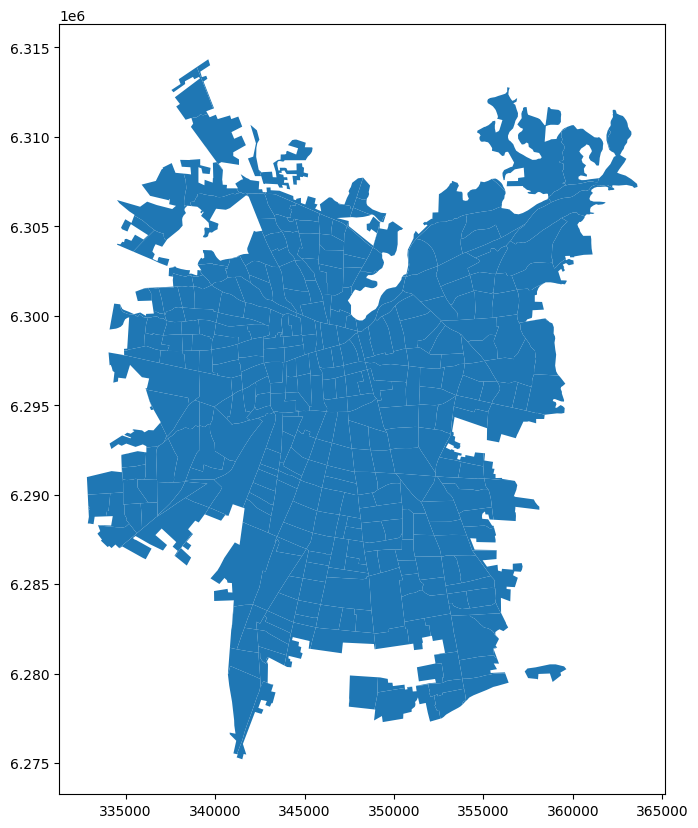

In [ ]:
distritos_urbanos.plot(figsize=(10,10))

### 5. Cree una nueva columna en el GeoDataFrame, que almacene el valor buscado en cada distrito. Hint: use el valor de la UF del día de hoy, en conjunto con el valor del metro cuadrado de cada distrito y sus superficies

Valor de la UF en pesos (06/05/2024) -> 37.291,74

In [ ]:
distritos_urbanos['Precio']=37291.74*distritos_urbanos['1_UF_M2']*distritos_urbanos['Area']

In [ ]:
distritos_urbanos.head()

,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,...,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry,Precio
0,Santiago,Ciudad,427491.444262,5.821041e+08,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,...,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346788.392 6299461.792, 346943.942 6...",8.165838e+11
1,Santiago,Ciudad,427491.444262,5.821041e+08,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,...,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345961.610 6299612.269, 346298.704 6...",9.179930e+11
2,Santiago,Ciudad,427491.444262,5.821041e+08,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,...,389.0,956.0,891.0,113.0,2387.0,509080.85,46.89,12.00,"POLYGON ((345650.511 6299703.570, 345809.442 6...",2.278141e+11
3,Santiago,Ciudad,427491.444262,5.821041e+08,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Brasil,...,657.0,1728.0,2202.0,423.0,5062.0,761738.52,66.45,10.25,"POLYGON ((345672.277 6298980.643, 345689.082 6...",2.911672e+11
4,Santiago,Ciudad,427491.444262,5.821041e+08,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Chacabuco,...,643.0,1092.0,974.0,145.0,2899.0,765782.74,37.86,11.87,"POLYGON ((344041.982 6298246.207, 344940.918 6...",3.389760e+11


<Axes: >

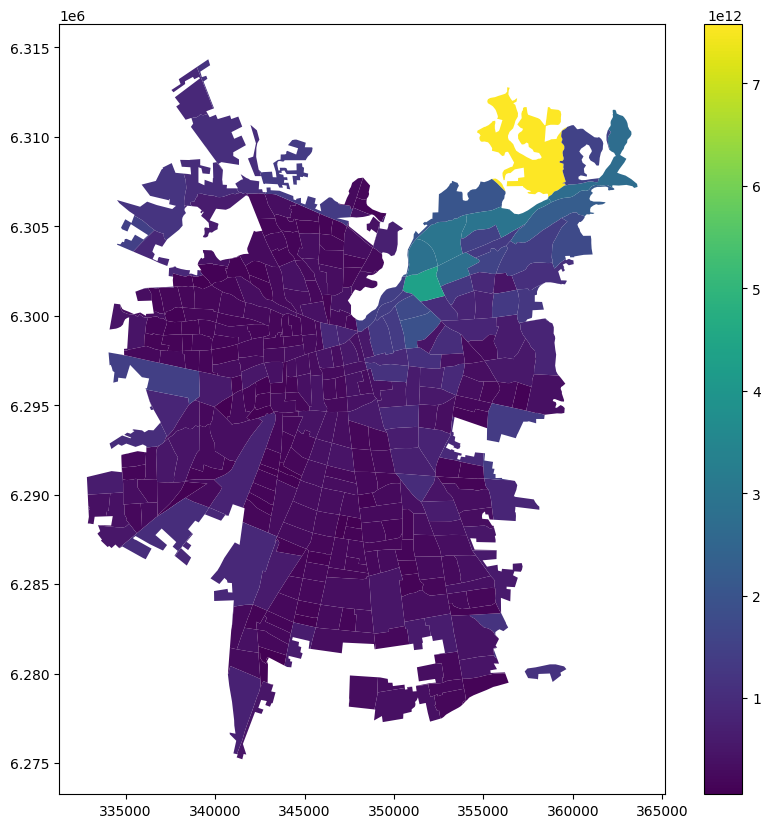

In [ ]:
distritos_urbanos.plot(figsize=(10,10),column='Precio', legend=True)

## Misión 2: Construya un ranking de los 5 distritos censales más poblados, que se encuentren a menos de 100 metros de una estación de metro. Hint 1: use sjoin en vez de overlay para encontrar la intersección entre un buffer de 100 metros alrededor de las estaciones y los distritos. Hint 2: tenga cuidado con los distritos duplicados luego de hacer la intersección. Hint 3: recuerde además que no es necesario tener el valor exacto de la población por distrito, basta únicamente un ranking.

Se carga el archivo .shp de las estaciones de metro

In [ ]:
estaciones_metro = gpd.read_file('Data/Metro 2020/Estaciones_2020/Estaciones_2020.shp')

Se revisan los datos

In [ ]:
estaciones_metro.head()

,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry
0,2,2,L2,EL PARRON,El Parrón,345717.3664,6.289105e+06,POINT (345717.366 6289105.444)
1,3,5,L5,CUMMING,Cumming,344899.1198,6.298782e+06,POINT (344899.120 6298781.571)
2,4,5,L5,QUINTA NORMAL,Quinta Normal,343809.1081,6.298628e+06,POINT (343808.803 6298622.125)
3,5,7,L4A,SAN RAMON,San Ramón,346685.4133,6.287624e+06,POINT (347436.975 6287501.270)
4,6,7,L4A,SANTA ROSA,Santa Rosa,348282.5816,6.287378e+06,POINT (348282.582 6287378.409)


Se grafica

<Axes: >

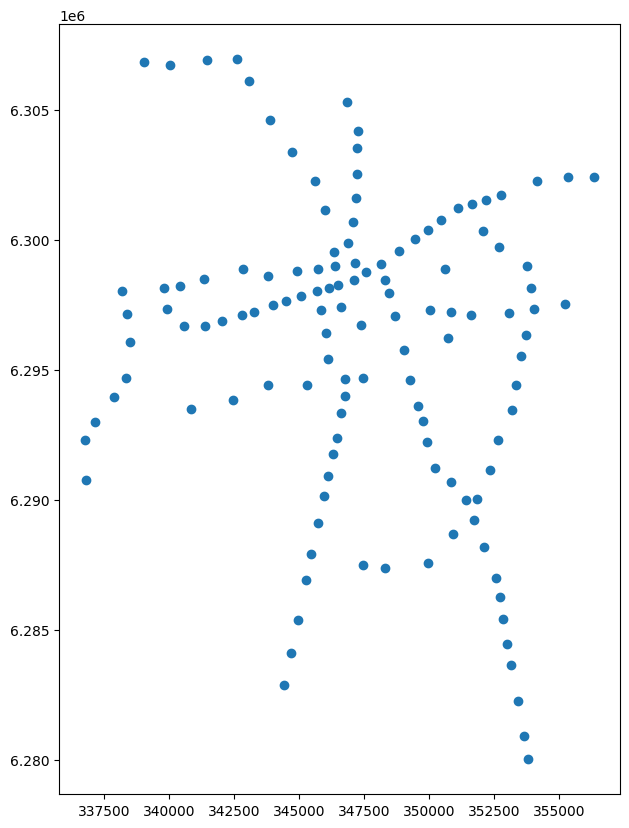

In [ ]:
estaciones_metro.plot(figsize=(10,10))

Se revisa la proyección

In [ ]:
estaciones_metro.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Para delimitar un área de 100 metros a la redonda de las estaciones, creamos un _buffer_ de 100 metros, el cual posteriormente intersectaremos con los distritos.

In [ ]:
# Generamos el buffer de las estaciones de metro
buffer_estaciones_metro = estaciones_metro.copy()
buffer_estaciones_metro.geometry = buffer_estaciones_metro.buffer(100)

In [ ]:
buffer_estaciones_metro.head()

,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,geometry
0,2,2,L2,EL PARRON,El Parrón,345717.3664,6.289105e+06,"POLYGON ((345817.366 6289105.444, 345816.885 6..."
1,3,5,L5,CUMMING,Cumming,344899.1198,6.298782e+06,"POLYGON ((344999.120 6298781.571, 344998.638 6..."
2,4,5,L5,QUINTA NORMAL,Quinta Normal,343809.1081,6.298628e+06,"POLYGON ((343908.803 6298622.125, 343908.321 6..."
3,5,7,L4A,SAN RAMON,San Ramón,346685.4133,6.287624e+06,"POLYGON ((347536.975 6287501.270, 347536.494 6..."
4,6,7,L4A,SANTA ROSA,Santa Rosa,348282.5816,6.287378e+06,"POLYGON ((348382.582 6287378.409, 348382.100 6..."


Se genera la intersección entre un buffer de 100 metros alrededor de las estaciones y los distritos usando sjoin.

In [ ]:
distritos_metro = gpd.sjoin(distritos, buffer_estaciones_metro, predicate='intersects')

In [ ]:
distritos_metro.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,1_UF_M2,geometry,index_right,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",62,65,1,L1,UNIVERSIDAD CATOLICA,Universidad Católica,347551.3269,6.298747e+06
9,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Vicuña Mackenna,1310110.0,28.0,394.0,1225.0,...,18.44,"POLYGON ((347488.430 6298672.836, 347569.109 6...",62,65,1,L1,UNIVERSIDAD CATOLICA,Universidad Católica,347551.3269,6.298747e+06
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",60,63,1,L1,SANTA LUCIA,Santa Lucía,347075.4514,6.298439e+06
10,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,San Isidro,1310111.0,53.0,779.0,1892.0,...,14.81,"POLYGON ((346958.269 6298373.448, 347071.088 6...",60,63,1,L1,SANTA LUCIA,Santa Lucía,347075.4514,6.298439e+06
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6...",80,84,5,L5,BELLAS ARTES,Bellas Artes,347155.8810,6.299103e+06


Se revisa si hay distritos duplicados

In [ ]:
distritos_metro['CODIGO'].value_counts().head()

CODIGO
1310113.0    5
1312308.0    4
1311001.0    4
1310102.0    4
1313001.0    4
Name: count, dtype: int64

Se eliminan duplicados

In [ ]:
distritos_metro = distritos_metro.drop_duplicates(subset=['CODIGO'])
distritos_metro['CODIGO'].value_counts().head()

CODIGO
1310101.0    1
1312405.0    1
1311703.0    1
1311707.0    1
1312605.0    1
Name: count, dtype: int64

Se crea una columna que tenga la población por distrito

In [ ]:
distritos_metro['Poblacion'] = distritos_metro['Area']*distritos_metro['Densidad']
distritos_metro.head()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,geometry,index_right,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,Poblacion
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,...,"POLYGON ((346775.511 6299463.724, 346788.392 6...",62,65,1,L1,UNIVERSIDAD CATOLICA,Universidad Católica,347551.3269,6.298747e+06,3.411705e+07
9,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Vicuña Mackenna,1310110.0,28.0,394.0,1225.0,...,"POLYGON ((347488.430 6298672.836, 347569.109 6...",62,65,1,L1,UNIVERSIDAD CATOLICA,Universidad Católica,347551.3269,6.298747e+06,3.764800e+07
10,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,San Isidro,1310111.0,53.0,779.0,1892.0,...,"POLYGON ((346958.269 6298373.448, 347071.088 6...",60,63,1,L1,SANTA LUCIA,Santa Lucía,347075.4514,6.298439e+06,5.310903e+07
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,...,"POLYGON ((345880.280 6299633.958, 345961.610 6...",55,58,1,L1,LA MONEDA,La Moneda,346187.8506,6.298170e+06,2.740484e+07
2,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Amunátegui,1310103.0,38.0,389.0,956.0,...,"POLYGON ((345546.017 6299748.840, 345650.511 6...",55,58,1,L1,LA MONEDA,La Moneda,346187.8506,6.298170e+06,2.387080e+07


In [ ]:
distritos_metro_ranking = distritos_metro.sort_values(by=['Poblacion'], ascending=False)
distritos_metro_ranking.head()

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,...,geometry,index_right,OBJECTID,ID_LINEA,LINEA,ESTACION,NOMBRE,POINT_X,POINT_Y,Poblacion
245,Región Metropolitana De Santiago,131,Santiago,13124,Pudahuel,Santa Corina,1312406.0,724.0,7544.0,8811.0,...,"POLYGON ((334267.487 6301075.153, 334270.956 6...",90,94,5,L5,BARRANCAS,Barrancas,338375.2852,6.297140e+06,2.123532e+08
319,Región Metropolitana De Santiago,132,Cordillera,13201,Puente Alto,San Carlos,1320108.0,92.0,3321.0,7148.0,...,"POLYGON ((353187.333 6283228.924, 354229.424 6...",7,9,4,L4,LAS MERCEDES,Las Mercedes,353659.7532,6.280834e+06,1.659284e+08
198,Región Metropolitana De Santiago,131,Santiago,13119,Maipú,Los Pajaritos,1311920.0,63.0,1694.0,4987.0,...,"POLYGON ((338548.229 6295040.434, 338535.777 6...",93,97,5,L5,MONTE TABOR,Monte Tabor,337837.1587,6.293899e+06,1.295803e+08
359,Región Metropolitana De Santiago,134,Maipo,13401,San Bernardo,Cerro Negro,1340106.0,751.0,5634.0,4429.0,...,"POLYGON ((345629.332 6282579.726, 345629.299 6...",125,131,2,L2,HOSPITAL EL PINO,Hospital El Pino,0.0000,0.000000e+00,1.210293e+08
253,Región Metropolitana De Santiago,131,Santiago,13125,Quilicura,Manuel Antonio Matta,1312504.0,294.0,3193.0,4731.0,...,"POLYGON ((336046.667 6310246.061, 336424.704 6...",101,107,3,L3,LO CRUZAT,Lo Cruzat,0.0000,0.000000e+00,1.164224e+08


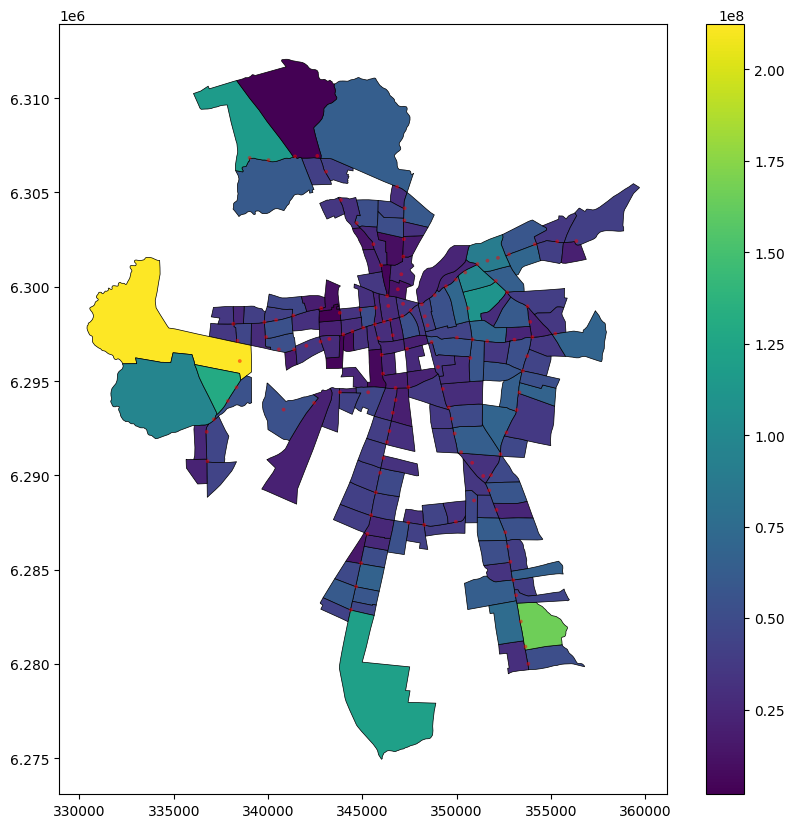

In [ ]:
ax = distritos_metro.plot(figsize = (10,10), column = 'Poblacion', edgecolor = 'black', linewidth = 0.5,legend = True)
ax1 = buffer_estaciones_metro.plot(ax=ax, alpha = 0.5, color = 'red')